<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW2/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Часть третья: Анализ датасет c Kaggle.com**

In [2]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

# Прочитайте csv файл (используйте функцию read_csv)

In [4]:
books = pd.read_csv("bestsellers with categories.csv")

In [5]:
len(books)

550

In [6]:
print(books)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# *Выведите первый пять строчек (используется функцию head)*

In [7]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# *Выведите размеры датасета (используйте атрибут shape)*

In [8]:
books.shape

(550, 7)

# **О скольки книгах хранит данные датасет? Ответ: 550**

In [9]:
copy_books = books.copy()

# *сменим регистр на маленький, а пробел заменим на нижнее подчеркивания (snake_style)*

In [10]:
copy_books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# **3.1 Первичное исследование данных**

# *Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)*

In [11]:
copy_books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

# Есть ли в каких либо переменных пропуски? Ответ: Нет

# *Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)*

In [12]:
copy_books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [13]:
copy_books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [14]:
un = copy_books.genre.unique()
print(un)

['Non Fiction' 'Fiction']


# Какие есть уникальные жанры? **Ответ: 'Non Fiction', 'Fiction'**

# *Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')*

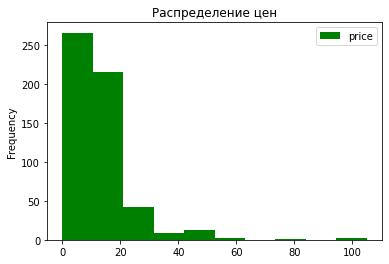

In [15]:
diagr = copy_books.plot(y='price', kind='hist', color='green',  title='Распределение цен')

# *Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)*

In [16]:
copy_books['price'].max()

105

In [17]:
copy_books['price'].min()

0

In [18]:
copy_books['price'].mean()

13.1

In [19]:
copy_books['price'].median()

11.0


# Mаксимальная цена? **Ответ: 105**
# Минимальная цена? **Ответ: 0**
# Средняя цена? **Ответ: 13.1**
# Медианная цена? **Ответ: 11.0**

# **3.2 Поиск и сортировка данных**

# Какой рейтинг в датасете наивысший? **Ответ: 4.9**

In [20]:
high_r = copy_books['user_rating'].max()

In [21]:
high_r

4.9

# Сколько книг имеют такой рейтинг? **Ответ: 52**

In [94]:
len(copy_books[copy_books['user_rating'] == high_r])

52

# У какой книги больше всего отзывов? **Ответ: Where the Crawdads Sing**

In [23]:
high_rew = copy_books['reviews'].max()

In [24]:
high_rew

87841

In [25]:
name_m = copy_books[['name', 'reviews']]

In [26]:
name_m[name_m['reviews'] == high_rew]

,name,reviews
534,Where the Crawdads Sing,87841


# Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? **Ответ: Humans of New York : Stories**

In [27]:
name_ex = copy_books[['name', 'user_rating', 'price', 'year']]

In [28]:
name_ex_new = name_ex[name_ex['user_rating'] == high_r]

In [29]:
name_ex_new_y = name_ex_new[name_ex_new['year'] == 2015]

In [30]:
pr_max = name_ex_new_y['price'].max()

In [31]:
name_ex_new_y = name_ex_new_y[name_ex_new_y['price'] == pr_max]

In [32]:
print(name_ex_new_y)

                             name  user_rating  price  year
174  Humans of New York : Stories          4.9     17  2015


# Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? **Ответ: 20**

In [33]:
n_fict = copy_books[['genre', 'year']]

In [34]:
n_fiction = n_fict[(n_fict['genre'] == 'Fiction') & (n_fict['year'] == 2010)]

In [35]:
print(len(n_fiction))

20


In [95]:
n_fiction.shape

(20, 2)

# Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? **Ответ: 1**

In [96]:
# y_rat = copy_books[['user_rating', 'year']]
y_rat = copy_books[['author', 'user_rating', 'year']]

In [97]:
print(y_rat)

                       author  user_rating  year
0                    JJ Smith          4.7  2016
1                Stephen King          4.6  2011
2          Jordan B. Peterson          4.7  2018
3               George Orwell          4.7  2017
4    National Geographic Kids          4.8  2019
..                        ...          ...   ...
545               Jeff Kinney          4.9  2019
546               Jen Sincero          4.7  2016
547               Jen Sincero          4.7  2017
548               Jen Sincero          4.7  2018
549               Jen Sincero          4.7  2019

[550 rows x 3 columns]


In [38]:
new_y_rat = y_rat[((y_rat['year'] == 2010) | (y_rat['year'] == 2011)) & ((y_rat['user_rating'] == 4.9))]

In [39]:
print(new_y_rat)

     user_rating  year
187          4.9  2011


In [40]:
len(new_y_rat)

1

In [98]:
y_rat.iloc[[187]]

,author,user_rating,year
187,Sarah Young,4.9,2011


# *И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).*

In [99]:
# sort_books = copy_books[['name', 'user_rating', 'price', 'year']]
sort_books = copy_books[['author', 'name', 'user_rating', 'price', 'year']]

In [42]:
# sort_book_year = sort_books[(sort_books['year'] == 2015) & (sort_books['user_rating'] == 4.9)]

In [100]:
sort_book_year = sort_books[(sort_books['year'] == 2015) & (sort_books['price'] < 8)]

In [101]:
print(sort_book_year.sort_values(by=['price']))

                 author                                               name  \
507          Harper Lee                              To Kill a Mockingbird   
210         Rob Elliott                      Laugh-Out-Loud Jokes for Kids   
206         Rob Elliott                         Knock-Knock Jokes for Kids   
111        Roger Priddy                                    First 100 Words   
123       Giles Andreae                               Giraffes Can't Dance   
54      Marjorie Sarnat  Creative Haven Creative Cats Coloring Book (Ad...   
63         Rod Campbell                     Dear Zoo: A Lift-the-Flap Book   
89          Marty Noble  Dover Creative Haven Art Nouveau Animal Design...   
478          Eric Carle                        The Very Hungry Caterpillar   
201       Bill O'Reilly  Killing Reagan: The Violent Assault That Chang...   
28                   DK                       Baby Touch and Feel: Animals   
224       Robert Munsch                                   Love Y

# Какая книга последняя в отсортированном списке? **Ответ: Old School (Diary of a Wimpy Kid #10)**

# **3.3 Агрегирование данных и соединения таблиц**

# *посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам*

In [45]:
new_genre = copy_books.groupby(['genre'])[['price']].agg(['min', 'max'])

In [46]:
new_genre

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

# Максимальная цена для жанра Fiction: **Ответ: 82**

# Минимальная цена для жанра Fiction: **Ответ: 0**

# Максимальная цена для жанра Non Fiction: **Ответ: 105**

# Минимальная цена для жанра Non Fiction: **Ответ: 0**

# *Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные*

In [47]:
new_data = copy_books.groupby(['author'])[['name']].agg(['count'])

In [48]:
new_data_ind = new_data.reset_index()

In [49]:
new_data_ind

,author,name
,,count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2


# Какой размерности вышла таблица? **Ответ: (248, 1)**

In [50]:
new_data.shape

(248, 1)

# У какого автора больше всего книг? **Ответ: Jeff Kinney**

In [51]:
m_books = new_data.max()

In [52]:
m_books.index

MultiIndex([('name', 'count')],
           )

In [104]:
m_books

name  count    12
dtype: int64

# first

In [109]:
new_data[new_data[('name', 'count')] == m_books[('name', 'count')]]

,name
,count
author,
Jeff Kinney,12


# second

In [54]:
new_data_b = new_data.sort_values(by=[('name', 'count')])

In [111]:
new_data_b

,name
,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11


# third

In [110]:
new_data[new_data[('name', 'count')] == 12]

,name
,count
author,
Jeff Kinney,12


# Сколько книг у этого автора? **Ответ: 12**

# *Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные*

In [56]:
new_data_mean = copy_books.groupby(['author'])[['user_rating']].agg(['mean'])

In [57]:
new_data_mean

,user_rating
,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000


# У какого автора средний рейтинг минимальный? **Ответ: Donna Tartt** 	

In [113]:
new_data_mean.min().index
# new_data_mean.index
# new_data_mean.mean().index

MultiIndex([('user_rating', 'mean')],
           )

In [59]:
n_m = new_data_mean.min()

In [114]:
n_m

user_rating  mean    3.9
dtype: float64

In [60]:
new_data_mean_ind = new_data_mean.reset_index()

In [63]:
new_data_mean_ind

,author,user_rating
,,mean
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000


# **first**

In [115]:
new_data_mean_ind[new_data_mean_ind[('user_rating', 'mean')] == n_m[('user_rating', 'mean')]]

,author,user_rating
,,mean
71,Donna Tartt,3.9


# **second**

In [116]:
new_data_mean_ind.sort_values(by=[('user_rating', 'mean')])

,author,user_rating
,,mean
71,Donna Tartt,3.9
100,Gillian Flynn,4.0
171,Muriel Barbery,4.0
90,Gallup,4.0
109,Ian K. Smith M.D.,4.1
...,...,...
146,Lin-Manuel Miranda,4.9
178,Patrick Thorpe,4.9
173,Nathan W. Pyle,4.9


# Какой у этого автора средний рейтинг? **Ответ: 3.9**

# *Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную*

# first

In [69]:
new_auth = pd.concat([new_data_ind, new_data_mean_ind[('user_rating', 'mean')]], axis=1)

In [70]:
new_auth

,author,name,user_rating
,,count,mean
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000


# second

In [71]:
# new_auth_second = pd.concat([new_data_ind, new_data_mean_ind], axis=1)

In [ ]:
# new_auth_second

# *Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)*

In [82]:
# f_sort = new_auth.sort_values(by=[('name', 'count')])

In [ ]:
# f_sort

In [92]:
fin_sort = new_auth.sort_values(by=[('user_rating', 'mean'), ('name', 'count')])

In [93]:
fin_sort

,author,name,user_rating
,,count,mean
71,Donna Tartt,2,3.9
171,Muriel Barbery,1,4.0
100,Gillian Flynn,3,4.0
90,Gallup,9,4.0
43,Chris Cleave,1,4.1
...,...,...,...
215,Sherri Duskey Rinker,2,4.9
82,Emily Winfield Martin,4,4.9
211,Sarah Young,6,4.9


# Какой автор первый в списке? **Ответ: Donna Tartt**